ValueError: operands could not be broadcast together with shapes (1000,3) (100,1) 

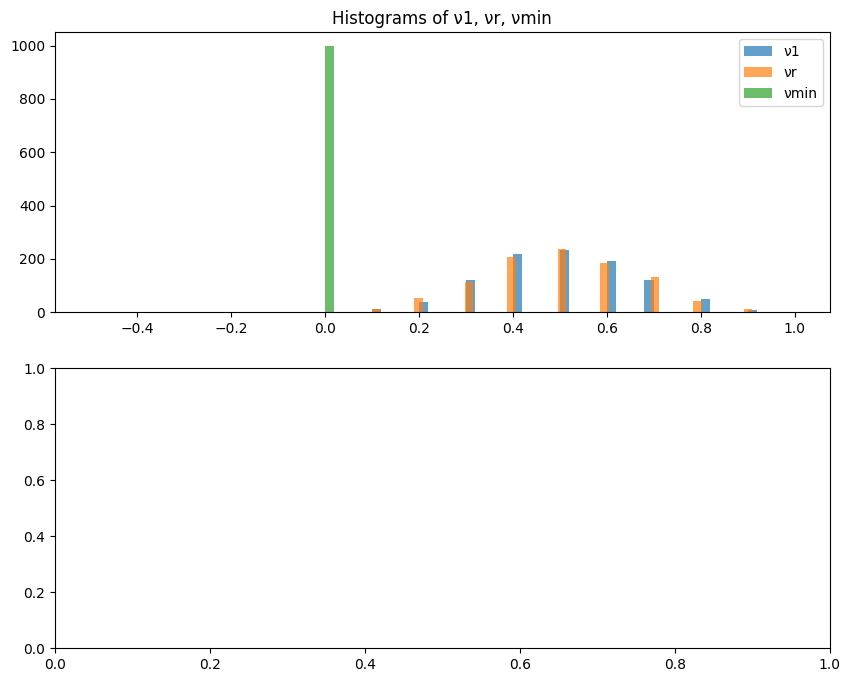

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def flip_coins(num_coins=1000, num_flips=10):
    results = np.random.randint(0, 2, size=(num_coins, num_flips))
    return results

def calculate_proportions(results):
    ν1 = results[0].mean()
    νr = results[np.random.choice(results.shape[0])].mean()
    νmin = results.min(axis=0).mean()
    return ν1, νr, νmin

def run_experiment(num_trials=1000):
    proportions = np.zeros((num_trials, 3))

    for i in range(num_trials):
        results = flip_coins()
        ν1, νr, νmin = calculate_proportions(results)
        proportions[i] = [ν1, νr, νmin]

    return proportions

def plot_histograms(proportions):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    ax1.hist(proportions[:, 0], bins=50, alpha=0.7, label='ν1')
    ax1.hist(proportions[:, 1], bins=50, alpha=0.7, label='νr')
    ax1.hist(proportions[:, 2], bins=50, alpha=0.7, label='νmin')
    ax1.legend()
    ax1.set_title('Histograms of ν1, νr, νmin')

    ε_values = np.linspace(0, 0.5, 100)
    hoeffding_bound = 2 * np.exp(-2 * (ε_values**2) * 10)
    empirical_probs = np.mean(np.abs(proportions - 0.5) > ε_values[:, np.newaxis], axis=0)

    ax2.plot(ε_values, empirical_probs, label='Empirical Probability')
    ax2.plot(ε_values, hoeffding_bound, label='Hoeffding Bound', linestyle='--')
    ax2.legend()
    ax2.set_title('Pr(|ν - µ| > ε) vs. ε with Hoeffding Bound')

    plt.show()

if __name__ == "__main__":
    proportions = run_experiment()
    plot_histograms(proportions)


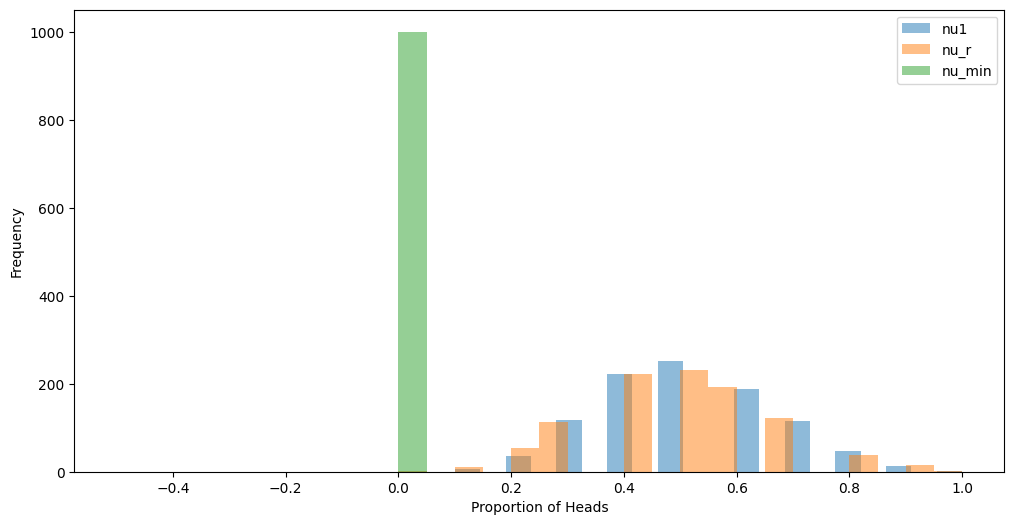

ValueError: operands could not be broadcast together with shapes (1000,3) (100,1) 

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def flip_coins(num_coins=1000, num_flips=10):
    results = np.random.randint(0, 2, size=(num_coins, num_flips))
    return results

def calculate_proportions(results):
    ν1 = results[0].mean()
    νr = results[np.random.choice(results.shape[0])].mean()
    νmin = results.min(axis=0).mean()
    return ν1, νr, νmin

def run_experiment(num_trials=1000):
    proportions = np.zeros((num_trials, 3))

    for i in range(num_trials):
        results = flip_coins()
        ν1, νr, νmin = calculate_proportions(results)
        proportions[i] = [ν1, νr, νmin]

    return proportions

def plot_histograms(proportions):
    
    # Plot the histograms
    plt.figure(figsize=(12, 6))
    plt.hist(proportions[:, 0], bins=20, alpha=0.5, label='nu1')
    plt.hist(proportions[:, 1], bins=20, alpha=0.5, label='nu_r')
    plt.hist(proportions[:, 2], bins=20, alpha=0.5, label='nu_min')
    plt.xlabel('Proportion of Heads')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
    

    ε_values = np.linspace(0, 0.5, 100)
    hoeffding_bound = 2 * np.exp(-2 * (ε_values**2) * 10)
    empirical_probs = np.mean(np.abs(proportions - 0.5) > ε_values.reshape(-1, 1), axis=0)
    
    print(hoeffding_bound.shape)
    print(empirical_probs.shape)

     # Plot the estimates and the Hoeffding bound
    plt.figure(figsize=(12, 6))
    plt.plot(ε_values, empirical_probs, label='Estimates')
    plt.plot(ε_values, hoeffding_bound, label='Hoeffding Bound')
    plt.xlabel('Epsilon')
    plt.ylabel('Probability')
    plt.legend()
    plt.show()
    

if __name__ == "__main__":
    proportions = run_experiment()
    plot_histograms(proportions)


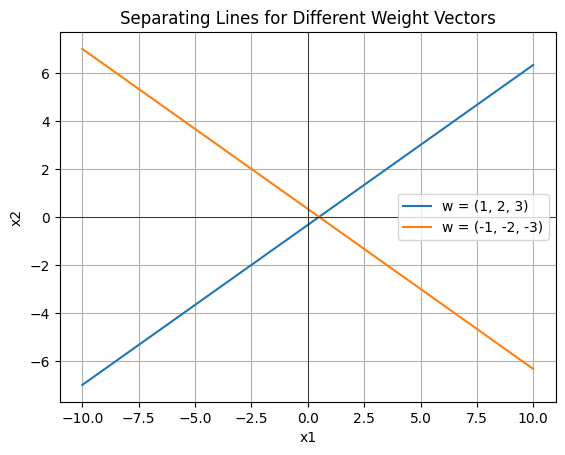

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Weight vector w = (1, 2, 3)
w1 = 2/3
w2 = -1/3
x1_vals = np.linspace(-10, 10, 100)
x2_vals = w1*x1_vals + w2

plt.plot(x1_vals, x2_vals, label='w = (1, 2, 3)')

# Weight vector w = (-1, -2, -3)
w1 = -2/3
w2 = 1/3
x2_vals = w1*x1_vals + w2

plt.plot(x1_vals, x2_vals, label='w = (-1, -2, -3)')

plt.xlabel('x1')
plt.ylabel('x2')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid(True)
plt.title('Separating Lines for Different Weight Vectors')
plt.show()